# Customer Financial Behavior Segmentation and Clustering Algorithms
## Project Title:  Exploratory Data Analysis and Advanced Clustering Techniques for Customer Segmentation 
### IMPORTING LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')


# Load cleaned dataset
df = pd.read_csv("../data_processed/cleaned_customers.csv")

df.head()


,Customer_ID,Age,Gender,Dependents,Education,MaritalStatus,Income,CardType,Tenure,RelationshipCount,InactiveMonths,ContactsLast12M,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,TotalTransactionAmount,TotalTransactionCount,TransactionChangeRatio,AvgUtilization
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 1.Exploratory Data Analysis
### 1.1 Minimum and Maximum AvgUtilization Attribute


In [2]:
df.info()
max = df['AvgUtilization'].max()
min = df['AvgUtilization'].min()
mean = df['AvgUtilization'].mean()
print("Max = ",max)
print("Min = ",min)
print("Mean = ",mean)
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             10127 non-null  int64  
 1   Age                     10127 non-null  int64  
 2   Gender                  10127 non-null  object 
 3   Dependents              10127 non-null  int64  
 4   Education               10127 non-null  object 
 5   MaritalStatus           10127 non-null  object 
 6   Income                  10127 non-null  object 
 7   CardType                10127 non-null  object 
 8   Tenure                  10127 non-null  int64  
 9   RelationshipCount       10127 non-null  int64  
 10  InactiveMonths          10127 non-null  int64  
 11  ContactsLast12M         10127 non-null  int64  
 12  Credit_Limit            10127 non-null  float64
 13  Total_Revolving_Bal     10127 non-null  int64  
 14  Avg_Open_To_Buy         10127 non-null

,count,mean,std,min,25%,50%,75%,max
Customer_ID,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependents,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Tenure,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
RelationshipCount,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
InactiveMonths,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
ContactsLast12M,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [3]:

# Check percentage of missing values
(df.isnull().mean() * 100).round(2)


Customer_ID               0.0
Age                       0.0
Gender                    0.0
Dependents                0.0
Education                 0.0
MaritalStatus             0.0
Income                    0.0
CardType                  0.0
Tenure                    0.0
RelationshipCount         0.0
InactiveMonths            0.0
ContactsLast12M           0.0
Credit_Limit              0.0
Total_Revolving_Bal       0.0
Avg_Open_To_Buy           0.0
Total_Amt_Chng_Q4_Q1      0.0
TotalTransactionAmount    0.0
TotalTransactionCount     0.0
TransactionChangeRatio    0.0
AvgUtilization            0.0
dtype: float64

### 1.2 Checking for outliers


In [4]:

# Function to calculate outlier percentage using IQR
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    num_outliers = np.sum((data < lower) | (data > upper))
    total = data.count()
    return round((num_outliers / total) * 100, 2)

# Select only numerical columns (exclude categorical and IDs)
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = [col for col in num_cols if col != 'Customer_ID']

# Display outlier percentage for each numeric column
print("🔹 Outlier Percentage by Feature:\n")
for col in num_cols:
    percent = outlier_percent(df[col])
    print(f'Outliers in "{col}": {percent}%')


🔹 Outlier Percentage by Feature:

Outliers in "Age": 0.02%
Outliers in "Dependents": 0.0%
Outliers in "Tenure": 3.81%
Outliers in "RelationshipCount": 0.0%
Outliers in "InactiveMonths": 3.27%
Outliers in "ContactsLast12M": 6.21%
Outliers in "Credit_Limit": 9.72%
Outliers in "Total_Revolving_Bal": 0.0%
Outliers in "Avg_Open_To_Buy": 9.51%
Outliers in "Total_Amt_Chng_Q4_Q1": 3.91%
Outliers in "TotalTransactionAmount": 8.85%
Outliers in "TotalTransactionCount": 0.02%
Outliers in "TransactionChangeRatio": 3.89%
Outliers in "AvgUtilization": 0.0%


In [5]:
# Calculate IQR boundaries for all numeric columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Create mask for rows that are NOT outliers
mask = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Create cleaned dataset
df_clean = df[mask]

print("Original shape:", df.shape)
print("After outlier removal:", df_clean.shape)
removed = df.shape[0] - df_clean.shape[0]
print(f"Rows removed due to outliers: {removed} ({round(removed/df.shape[0]*100, 2)}%)")


Original shape: (10127, 20)
After outlier removal: (6801, 20)
Rows removed due to outliers: 3326 (32.84%)


### 1.3 Conversion & Imputation

In [6]:
# Convert numeric fields to numbers (coerce errors to NaN)
num_cols = ['TotalTransactionCount','TotalTransactionAmount','Credit_Limit']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Show counts of NaNs
print("NaNs per important column:")
print(df[num_cols].isna().sum())

NaNs per important column:
TotalTransactionCount     0
TotalTransactionAmount    0
Credit_Limit              0
dtype: int64


## 2. Data Visualization
### 2.1 Countplot Representation of Categorical feature

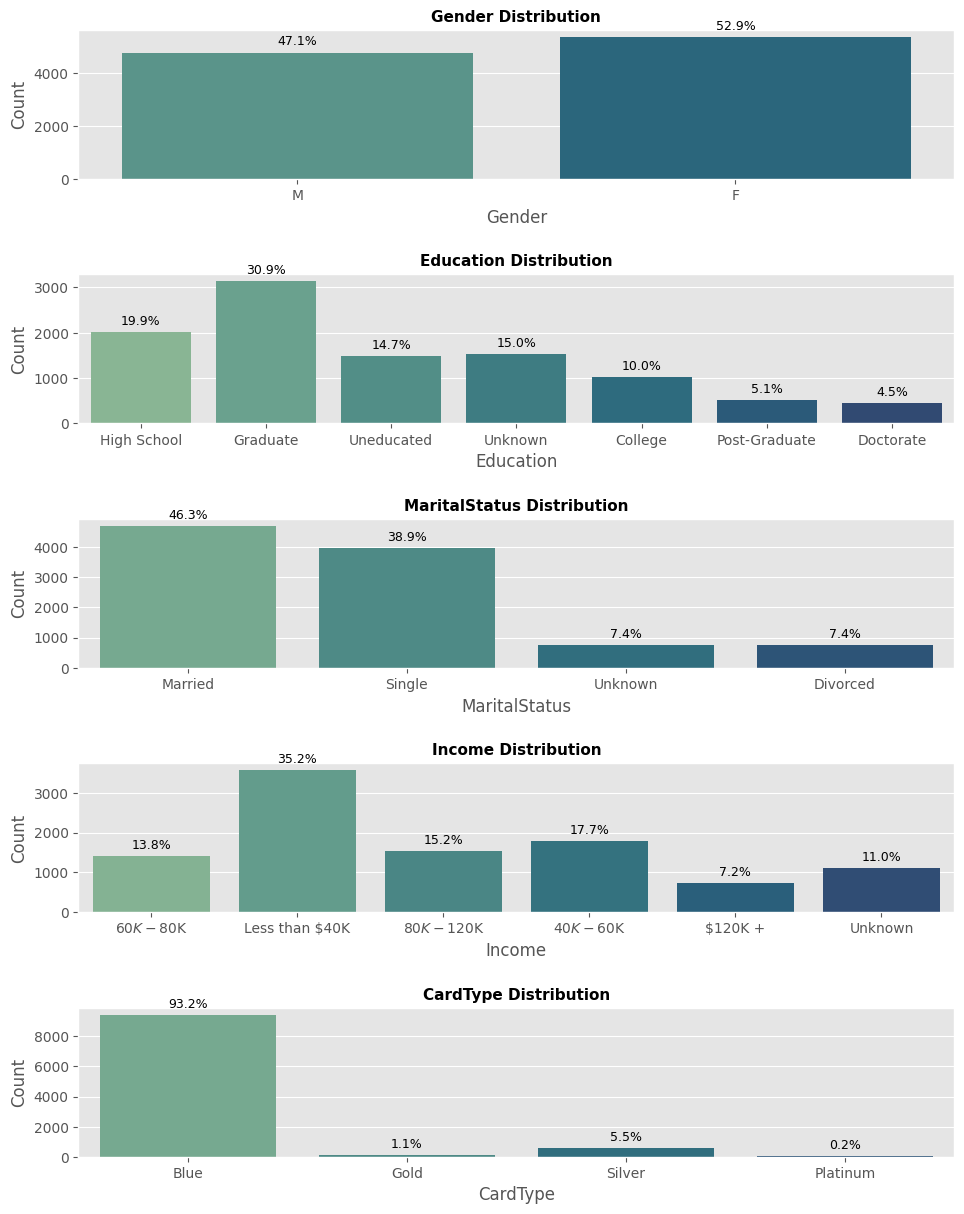

In [7]:
cat_cols = ["Gender", "Education", "MaritalStatus", "Income", "CardType"]
plt.figure(figsize=(10, len(cat_cols)*2.5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    ax = sns.countplot(data=df, x=col, palette="crest")
    plt.title(f"{col} Distribution", fontsize=11, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")

    # Add percentage labels above bars
    total = len(df[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                    textcoords='offset points')
    plt.tight_layout(pad=2)
plt.show()


### 2.2 Histogram representation of Numeric feature

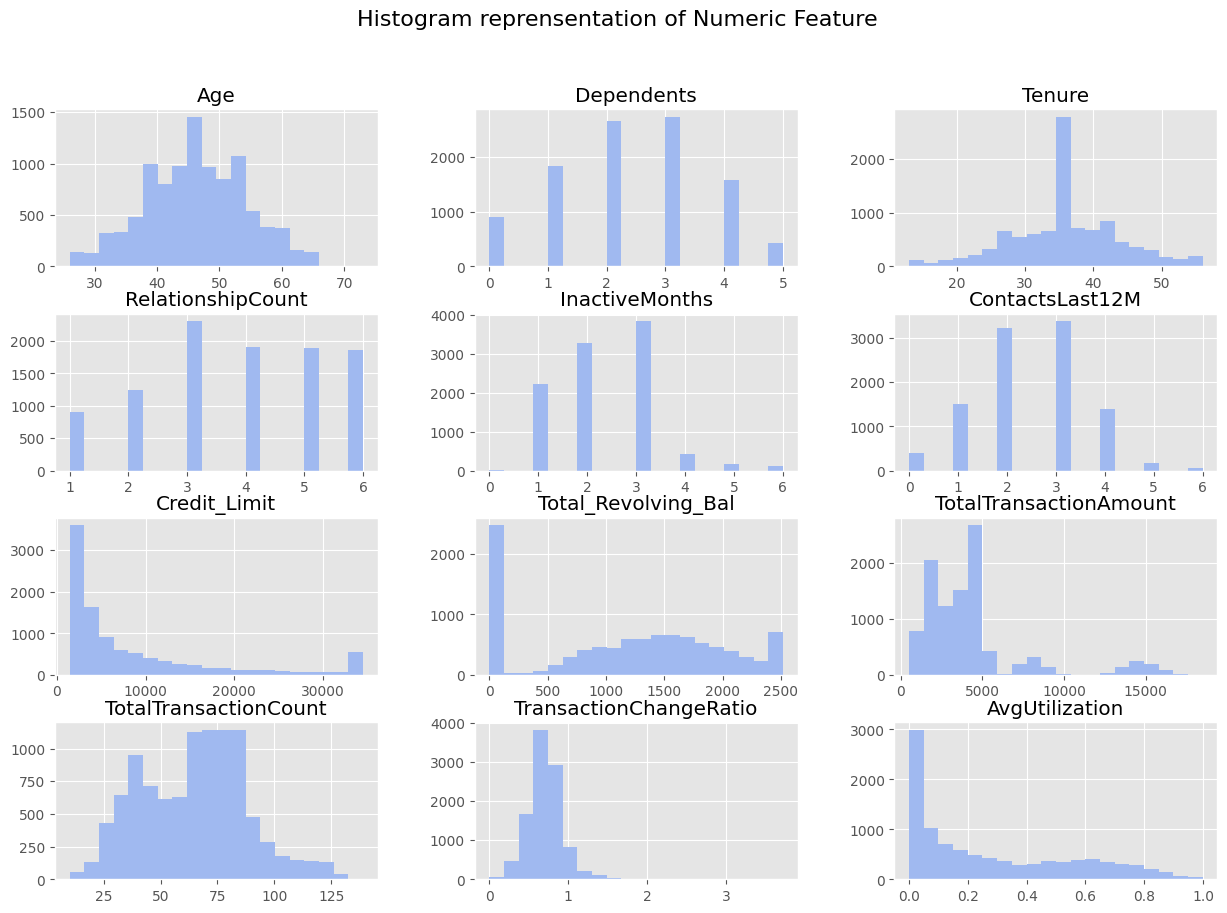

In [8]:
num_cols = [
    "Age", "Dependents", "Tenure", "RelationshipCount",
    "InactiveMonths", "ContactsLast12M", "Credit_Limit",
    "Total_Revolving_Bal", "TotalTransactionAmount",
    "TotalTransactionCount", "TransactionChangeRatio",
    "AvgUtilization"
]

df[num_cols].hist(bins=20, figsize=(15,10), color="#a0b9f0")
plt.suptitle("Histogram reprensentation of Numeric Feature", fontsize=16)
plt.show()
#EXPLORE NUMERIC FEATURE

### 2.3 Heatmap (Correlation Analysis)

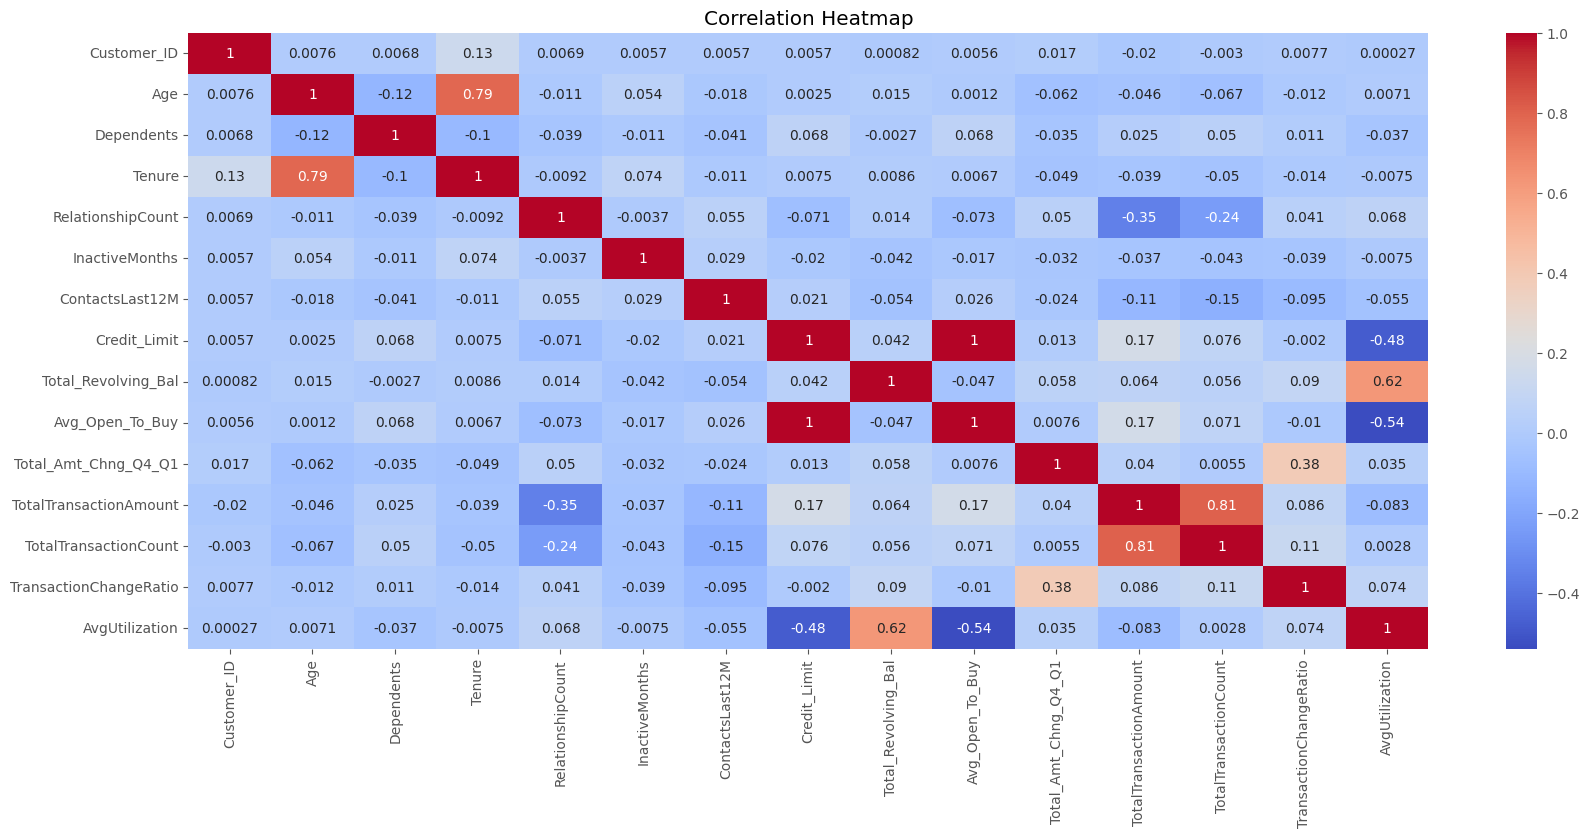

In [9]:
#correlation heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


## 3. FEATURE ENGINEERING

In [10]:

# Utilization-based Features
df["new_CreditUsage_Ratio"] = df["Total_Revolving_Bal"] / df["Credit_Limit"]
df["new_Revolving_to_Available"] = df["Total_Revolving_Bal"] / df["AvgUtilization"]

# Transaction-based Features
df["new_Avg_Transaction_Value"] = df["TotalTransactionAmount"] / df["TotalTransactionCount"]
df["new_Transaction_Efficiency"] = df["TotalTransactionCount"] / df["Tenure"]
df["new_Activity_Level"] = df["TotalTransactionAmount"] / df["Tenure"]

# Behavior-based Ratios
df["new_Inactive_to_Tenure"] = df["InactiveMonths"] / df["Tenure"]
df["new_Contacts_per_Tenure"] = df["ContactsLast12M"] / df["Tenure"]
df["new_Dependents_to_Relationship"] = df["Dependents"] / df["RelationshipCount"]

# Change Indicators
df["new_TransactionChange_Effect"] = df["TransactionChangeRatio"] * df["TotalTransactionCount"]
df["new_Spending_Change"] = df["TransactionChangeRatio"] * df["TotalTransactionAmount"]

# Financial Strength Indicators
df["new_Credit_to_Transaction"] = df["Credit_Limit"] / df["TotalTransactionAmount"]
df["new_Balance_to_Transaction"] = df["Total_Revolving_Bal"] / df["TotalTransactionAmount"]

# 🔍 Check Missing Values after Feature Engineering
df.isnull().sum().sort_values(ascending=False).head()

new_Revolving_to_Available    2470
Customer_ID                      0
Gender                           0
Age                              0
Education                        0
dtype: int64

In [11]:
# 🧾 Setting Index (if Customer_ID present)
if "Customer_ID" in df.columns:
    df.set_index("Customer_ID", inplace=True)

df.head()


,Age,Gender,Dependents,Education,MaritalStatus,Income,CardType,Tenure,RelationshipCount,InactiveMonths,...,new_Avg_Transaction_Value,new_Transaction_Efficiency,new_Activity_Level,new_Inactive_to_Tenure,new_Contacts_per_Tenure,new_Dependents_to_Relationship,new_TransactionChange_Effect,new_Spending_Change,new_Credit_to_Transaction,new_Balance_to_Transaction
Customer_ID,,,,,,,,,,,,,,,,,,,,,
768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,27.238095,1.076923,29.333333,0.025641,0.076923,0.600000,68.250,1859.000,11.093531,0.679196
818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,39.121212,0.750000,29.340909,0.022727,0.045455,0.833333,122.562,4794.774,6.395043,0.669249
713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,94.350000,0.555556,52.416667,0.027778,0.000000,0.750000,46.660,4402.371,1.811341,0.000000
769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,58.550000,0.588235,34.441176,0.117647,0.029412,1.333333,46.660,2731.943,2.829206,2.149445
709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,29.142857,1.333333,38.857143,0.047619,0.000000,0.600000,70.000,2040.000,5.779412,0.000000


## 4. Clustering Techniques

### 4.1 Hierarchial 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

#  Load Data
df = pd.read_csv('../data_processed/cleaned_customers.csv')
features = [
    'Age','Tenure','Credit_Limit','Total_Revolving_Bal','AvgUtilization',
    'TotalTransactionAmount','TotalTransactionCount','TransactionChangeRatio',
    'InactiveMonths','ContactsLast12M'
]
X = df[features]

# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)



,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


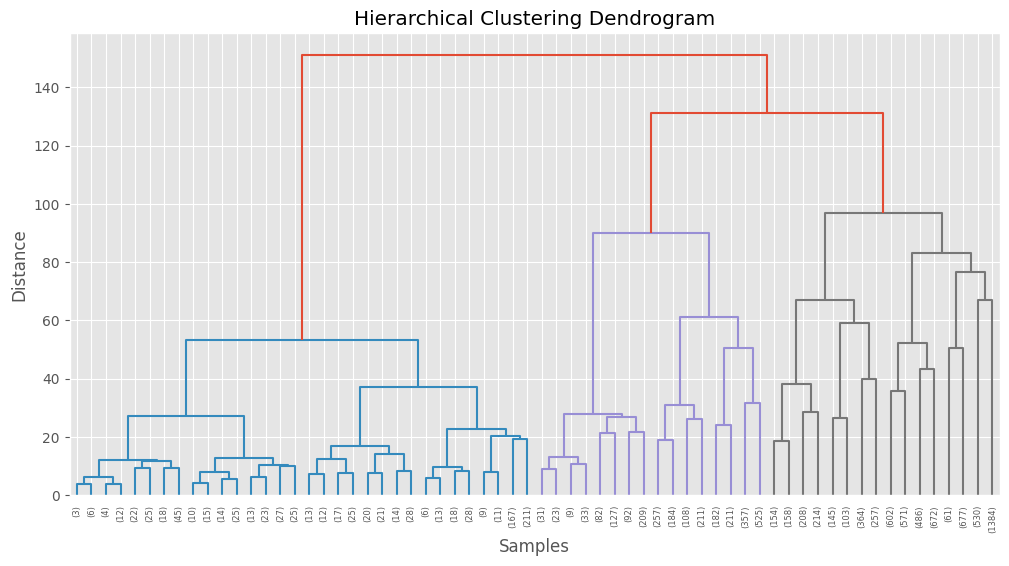

In [25]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='level',   # Shows cleaner tree
           p=5)                     # Number of levels to show 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [59]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=4)
hier_labels = hier.fit_predict(X_scaled)


In [60]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_hier = silhouette_score(X_scaled, hier_labels)
ch_hier = calinski_harabasz_score(X_scaled, hier_labels)
db_hier = davies_bouldin_score(X_scaled, hier_labels)


In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

K = range(2, 11)

sse = []
sil_scores = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    
    sse.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Create results table
results = pd.DataFrame({
    'k': list(K),
    'SSE': sse,
    'Silhouette Score': sil_scores
})

results


,k,SSE,Silhouette Score
0,2,87717.782302,0.136938
1,3,76603.609440,0.162445
2,4,70009.361007,0.141629
3,5,64552.339489,0.153652
4,6,61217.712410,0.144422
5,7,58419.875508,0.134490
6,8,55526.454275,0.138207
7,9,53552.563023,0.136018
8,10,51624.584786,0.131929


In [32]:
#  Choose No of Clusters & Fit Agglomerative Clustering
k = 4
hc = AgglomerativeClustering(
    n_clusters=k,
    linkage='ward'
)
cluster_labels = hc.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

# Cluster Summary (Core Analysis)
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Summary:\n")
print(cluster_summary)


Cluster Summary:

               Age     Tenure  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                            
0        45.224915  34.684968  11698.311397           293.092768   
1        54.368060  44.027449   6076.677293          1304.954460   
2        44.509733  34.120811   6373.434477          1528.120008   
3        45.288889  35.160000  16689.796667          1439.217778   

         AvgUtilization  TotalTransactionAmount  TotalTransactionCount  \
Cluster                                                                  
0              0.017079             3489.329421              58.485044   
1              0.372639             3176.458515              56.904554   
2              0.400747             3635.886815              63.249649   
3              0.160530            13528.195556             106.637778   

         TransactionChangeRatio  InactiveMonths  ContactsLast12M  
Cluster                                                     

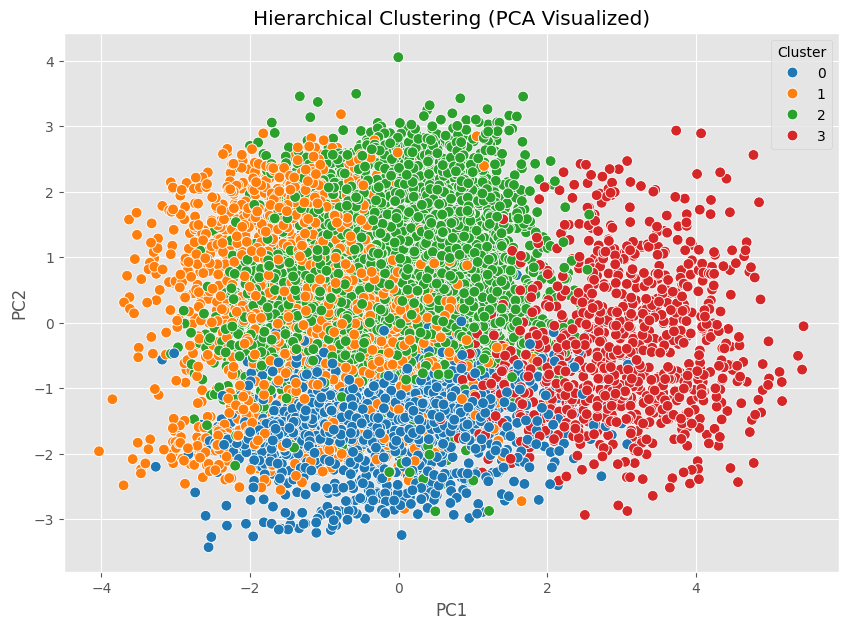

In [33]:
#  Visualize Clusters using PCA (2D Plot)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, x='PC1', y='PC2',
    hue='Cluster', palette='tab10', s=60
)
plt.title("Hierarchical Clustering (PCA Visualized)")
plt.show()

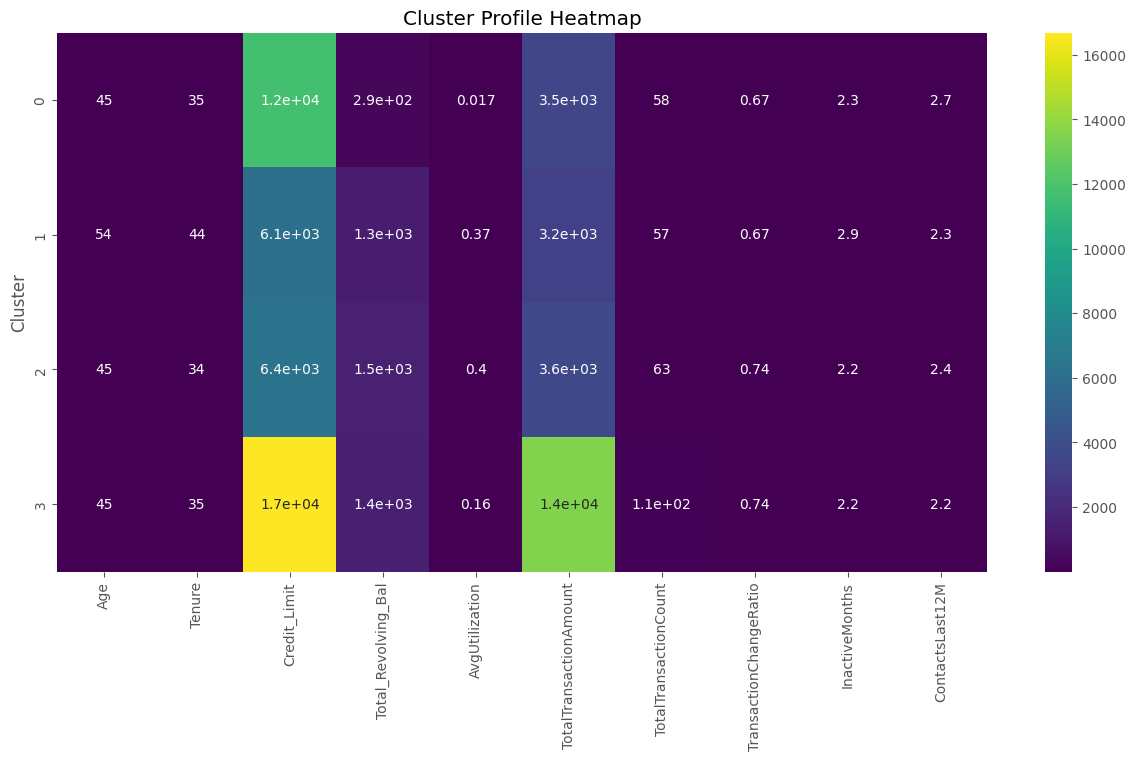

In [34]:
# Heatmap of Cluster Means
plt.figure(figsize=(15,7))
sns.heatmap(cluster_summary, annot=True, cmap='viridis')
plt.title("Cluster Profile Heatmap")
plt.show()

## 4.2 KMeans 

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    labels = km.labels_
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"K = {k} --> Silhouette Score = {sil:.4f}")


K = 2 --> Silhouette Score = 0.1369
K = 3 --> Silhouette Score = 0.1624
K = 4 --> Silhouette Score = 0.1416
K = 5 --> Silhouette Score = 0.1537
K = 6 --> Silhouette Score = 0.1444
K = 7 --> Silhouette Score = 0.1345
K = 8 --> Silhouette Score = 0.1382
K = 9 --> Silhouette Score = 0.1360
K = 10 --> Silhouette Score = 0.1319


In [45]:
from sklearn.cluster import KMeans

# Choose number of clusters
k = 3  # <-- change based on elbow/silhouette result

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Predicted cluster labels
kmeans_labels = kmeans.labels_

In [46]:
df['KMeans_Cluster'] = kmeans_labels
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

print("K-Means Clustering Performance:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Calinski-Harabasz Score: {ch_kmeans:.4f}")
print(f"Davies-Bouldin Score: {db_kmeans:.4f}")

K-Means Clustering Performance:
Silhouette Score: 0.1624
Calinski-Harabasz Score: 1629.9674
Davies-Bouldin Score: 1.9649


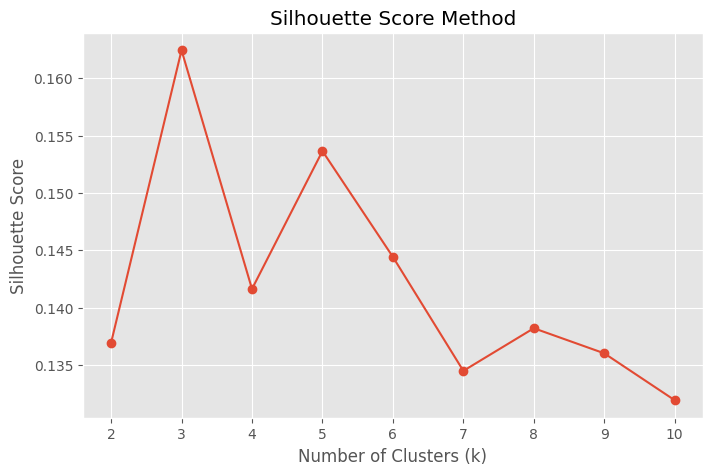

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


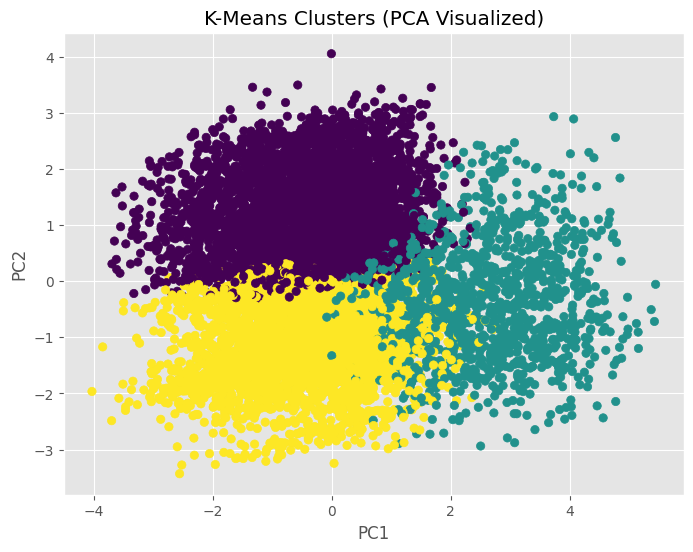

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1],
            c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clusters (PCA Visualized)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## 5. Cluster Performance

### 5.1 K-means Performance

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

print("K-Means Performance:")
print(f"Silhouette Score = {sil_kmeans:.4f}")
print(f"Calinski-Harabasz Score = {ch_kmeans:.4f}")
print(f"Davies-Bouldin Score = {db_kmeans:.4f}")


K-Means Performance:
Silhouette Score = 0.1624
Calinski-Harabasz Score = 1629.9674
Davies-Bouldin Score = 1.9649


### 5.2 Hierarchical Performance

In [61]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_hier = silhouette_score(X_scaled, hier_labels)   # replace with your labels
ch_hier = calinski_harabasz_score(X_scaled, hier_labels)
db_hier = davies_bouldin_score(X_scaled, hier_labels)

print("Hierarchical Performance:")
print(f"Silhouette Score = {sil_hier:.4f}")
print(f"Calinski-Harabasz Score = {ch_hier:.4f}")
print(f"Davies-Bouldin Score = {db_hier:.4f}")


Hierarchical Performance:
Silhouette Score = 0.1060
Calinski-Harabasz Score = 1087.4969
Davies-Bouldin Score = 2.3129


## 6. Cluster Comparison

In [62]:
import pandas as pd

results = {
    'Model': ['K-Means', 'Hierarchical'],
    'Optimal k': [3, 4],
    'Silhouette Score': [sil_kmeans, sil_hier],
    'Calinski-Harabasz Score': [ch_kmeans, ch_hier],
    'Davies-Bouldin Score': [db_kmeans, db_hier]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)


          Model  Optimal k  Silhouette Score  Calinski-Harabasz Score  \
0       K-Means          3          0.162445              1629.967368   
1  Hierarchical          4          0.106047              1087.496944   

   Davies-Bouldin Score  
0              1.964944  
1              2.312934  
